In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Implementation of DBSCAN using KNN

In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None

    def fit(self, X):
        self.labels_ = np.zeros(len(X))  # Initialize cluster labels
        cluster_id = 0  # Current cluster ID

        # Iterate over each point in the dataset
        for i in range(len(X)):
            if self.labels_[i] != 0:  # Skip if point is already assigned to a cluster
                continue

            # Find the neighbors of the current point
            neighbors = self._get_neighbors(X, i)
            
            print("Neighbors", neighbors)

            if len(neighbors) < self.min_samples:
                # Assign point as noise (label = -1)
                self.labels_[i] = -1
            else:
                cluster_id += 1
                self._expand_cluster(X, i, neighbors, cluster_id)

    def _get_neighbors(self, X, i):
        # Calculate the Euclidean distances between the current point and all other points
        distances = np.linalg.norm(X - X[i], axis=1)
        # Find the indexes of points within epsilon distance
        neighbors = np.where(distances <= self.eps)[0]
        return neighbors

    def _expand_cluster(self, X, i, neighbors, cluster_id):
        # Assign current point to the cluster
        self.labels_[i] = cluster_id

        j = 0
        while j < len(neighbors):
            neighbor = neighbors[j]

            if self.labels_[neighbor] == -1:  # Assign noise point to the cluster
                self.labels_[neighbor] = cluster_id

            elif self.labels_[neighbor] == 0:  # Expand cluster recursively
                self.labels_[neighbor] = cluster_id
                new_neighbors = self._get_neighbors(X, neighbor)

                if len(new_neighbors) >= self.min_samples:
                    neighbors = np.concatenate((neighbors, new_neighbors))

            j += 1




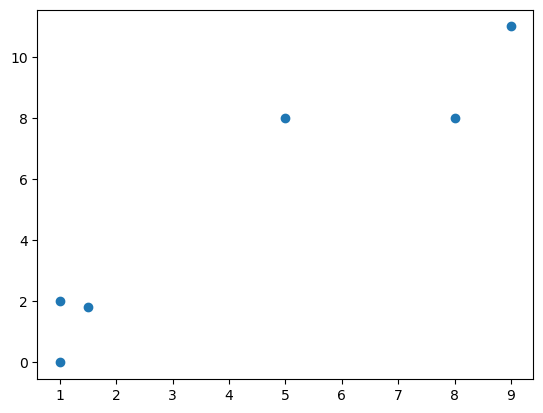

Neighbors [0 1 4]
Neighbors [2]
Neighbors [3]
Neighbors [5]
Cluster labels: [ 1.  1. -1. -1.  1. -1.]


In [3]:
import matplotlib.pyplot as plt

# Usage example
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0], [9, 11]])
plt.scatter(X[:,0], X[:,1])
plt.show()
eps = 2.0
min_samples = 2

dbscan = DBSCAN(eps, min_samples)
dbscan.fit(X)

print("Cluster labels:", dbscan.labels_)

In [4]:
from sklearn.datasets import make_moons
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [5]:
X, y= make_moons(n_samples=500, noise=0.06, random_state=0)

In [6]:
data = pd.DataFrame(dict(X=X[:, 0], Y=X[:, 1]))
print(data)
data = data.values


            X         Y
0    0.385886  0.903598
1   -0.114904  0.460881
2    0.116865  0.100875
3    1.758096 -0.123967
4    1.911196 -0.127638
..        ...       ...
495  0.457700 -0.260282
496 -0.772801  0.582962
497 -0.072156  1.064630
498  0.793919  0.531936
499 -0.556170  0.741397

[500 rows x 2 columns]


In [7]:
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps, min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_, dbscan.labels_.size)

Neighbors [  0  28  49  77 189 192 197 212 223 254 255 377 384 386 408 415 460 483]
Neighbors [  1 205 232 243 349 494]
Neighbors [8]
Neighbors [36 80]
Neighbors [82]
Neighbors [104 159]
Neighbors [163]
Neighbors [325]
Neighbors [396]
Neighbors [426]
Cluster labels: [ 1.  2.  2.  2.  2.  1.  2.  2. -1.  1.  1.  2.  2.  2.  1.  2.  2.  2.
  1.  1.  1.  2.  1.  1.  1.  2.  1.  2.  1.  1.  2.  1.  1.  1.  2.  2.
  2.  2.  2.  1.  2.  1.  2.  1.  1.  1.  1.  2.  2.  1.  2.  1.  2.  1.
  1.  1.  2.  1.  1.  2.  1.  2.  2.  2.  2.  1.  1.  2.  2.  1.  1.  1.
  2.  2.  1.  2.  2.  1.  2.  2. -1.  1. -1.  1.  2.  2.  2.  1.  2.  1.
  1.  2.  2.  1.  1.  2.  1.  2.  1.  1.  1.  2.  1.  2. -1.  2.  1.  1.
  2.  1.  2.  1.  1.  1.  2.  2.  2.  2.  1.  1.  2.  1.  1.  2.  2.  1.
  1.  2.  2.  2.  2.  1.  2.  1.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.
  2.  1.  2.  2.  1.  1.  1.  2.  1.  2.  1.  1.  1.  1.  2.  1.  2.  1.
  1. -1.  1.  1.  2.  2.  2.  2.  2.  1.  2.  2.  2.  1.  2.  1.  2.  2.
  2

# Ploting the points
# 

     idx  cluster
0      0      1.0
1      1      2.0
2      2      2.0
3      3      2.0
4      4      2.0
..   ...      ...
495  495      2.0
496  496      1.0
497  497      1.0
498  498      1.0
499  499      1.0

[500 rows x 2 columns]


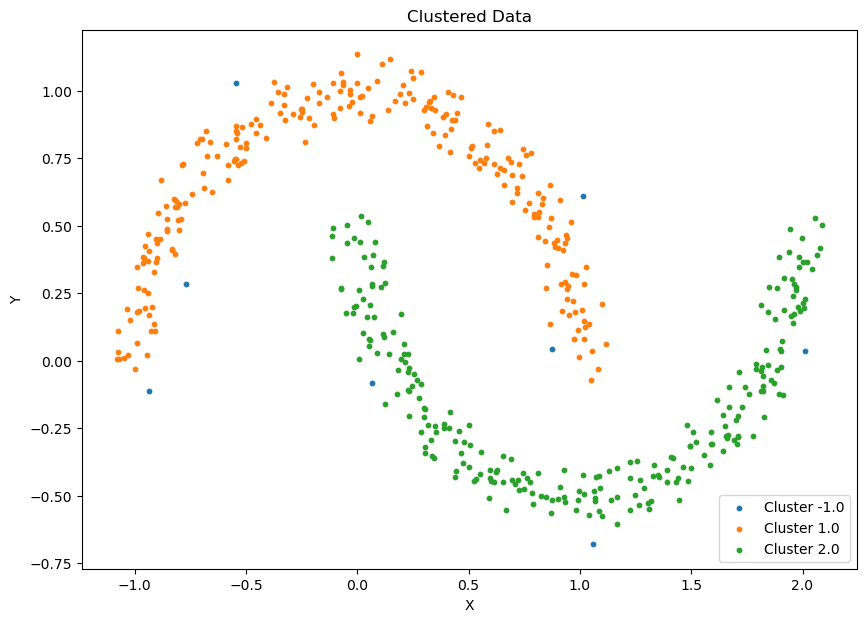

In [8]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()